Benjamin Katz<br>
Due Monday Apr 3rd<br>
Due Week 10

In [274]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [275]:
#Download the data from the csv file into a pandas database
traindf = pd.read_csv('train.csv', sep=',')
#Encode the city data so that each city can be a column and a 1 if it is that city and a zero if not
#this one hot encoding technique works well when measuring distances becasue we 
#do not want the model to think that cities are similar becasue they are close alphabetically
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded_city = label_encoder.fit_transform(traindf.City)

#Seperate out the revenue for the y training as the target and normalize the data
y_training = traindf.loc[:,'revenue']/1000000.0
#drop other info that is text based and not useful or will be encoded
#Drop the id, just becasue they are next to each other on the list does not mean they are similar
X_training = traindf.drop(columns = ['revenue', 'City', 'Open Date', 'Id'])
#Begin encoding the city data
for i in range(34):
  X_training["C"+str(i)] = 0
i = 0
#Since the city is very relevant, set it to 10
for city_id in integer_encoded_city:
  X_training.at[i, 'C'+str(city_id)] = 10
  i+=1



In [276]:
#Do the same thing as before but encode the Type data
label_encoder = LabelEncoder()
integer_encoded_type = label_encoder.fit_transform(traindf.Type)

for i in range(3):
  X_training["T"+str(i)] = 0
i = 0

#The type data is very imortant so we will assign it a value of 15
for type_id in integer_encoded_type:
  X_training.at[i, 'T'+str(type_id)] = 15
  i+=1

X_training = X_training.drop(columns = ['Type'])

In [277]:
#Do the same thing for the city group data
label_encoder = LabelEncoder()
integer_encoded_city_group = label_encoder.fit_transform(traindf['City Group'])

for i in range(2):
  X_training["CG"+str(i)] = 0
i = 0

#Since the city group data is not so imortant only give it a 1 or 0
for cg_id in integer_encoded_city_group:
  X_training.at[i, 'CG'+str(cg_id)] = 1
  i+=1
X_training = X_training.drop(columns = ['City Group'])


In [278]:
#split the data into training and testing
X_training, X_testing, y_training, y_testing = train_test_split(X_training, y_training, test_size = 0.1, random_state = 42)
#split the data into testing and validation
X_testing, X_validation, y_testing, y_validation = train_test_split(X_testing, y_testing, test_size = 0.1, random_state = 42)

In [279]:
from sklearn.neighbors import KNeighborsRegressor
#Perform a knn regression with 3 neighbors and fit the model

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_training, y_training)

KNeighborsRegressor(n_neighbors=3)

In [280]:
#predict from the model, aka find the 3 closest neighbors from the training data
#and calculate the average of them,
preds = model.predict(X_testing)


from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

print("Knn predictions evaluation:")
print("MAE: "+str(mean_absolute_error(preds, y_testing)))
print("MSE: "+str(mean_squared_error(preds, y_testing)))
print("R2 score: "+str(r2_score(preds, y_testing)))


Knn predictions evaluation:
MAE: 1.794279638888889
MSE: 5.761766424430696
R2 score: -0.36942500774649134


Part 2: training with a linear model. 

In [281]:
from sklearn import datasets, linear_model
# Train the model using the training sets
#Lasso applies the l1 regularization to the model l1 regularization this removes features it deems unimportant by shrinikng the weight to 0
regr = linear_model.Lasso()
regr.fit(X_training, y_training)
linear_prediction = regr.predict(X_testing)

In [282]:
print("Linear predictions evaluation:")
print("MAE: "+str(mean_absolute_error(linear_prediction, y_testing)))
print("MSE: "+str(mean_squared_error(linear_prediction, y_testing)))
print("R2 score: "+str(r2_score(linear_prediction, y_testing)))

Linear predictions evaluation:
MAE: 1.5375583622608777
MSE: 4.198799118577425
R2 score: -9.726938922040063


In [283]:
import keras
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Build a sequential model to have a NN make a regression
model = keras.Sequential()
model.add(Dense(50,activation = 'sigmoid'))
model.add(Dense(20,activation = 'sigmoid'))
#End at one node with an activation of relu so that a prediction is possible
model.add(Dense(1,activation = 'relu'))


#Set gradient desent and find the linear regression with a given loss function of mean squared error. 
model.compile(optimizer='adam', loss = losses.MeanSquaredError())
#actually perform the gradient desent over 100 epochs on the training data 
#We could have a larger neural net and train over more data but it is 
#too easy to overfit this small database
history = model.fit(X_training, y_training, epochs=100)
model.summary()



Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 22.7632
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 20.7997
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 18.9179
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 17.2314
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 15.8337
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 14.4741
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 13.3707
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 12.4196
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 11.6218
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 10.9523
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 10.3574
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 9.9355
Epoch 13/100
4/4 [==============================] 

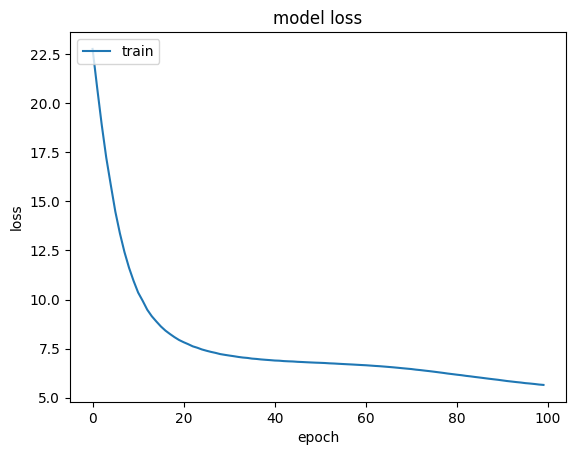

In [284]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [285]:
nn_pred = model.predict(X_testing)
print("Neural Network predictions evaluation:")
print("MAE: "+str(mean_absolute_error(nn_pred, y_testing)))
print("MSE: "+str(mean_squared_error(nn_pred, y_testing)))
print("R2 score: "+str(r2_score(nn_pred, y_testing)))

1/1 [==============================] - 0s 54ms/step
Neural Network predictions evaluation:
MAE: 1.1725343922093707
MSE: 2.8999617845816554
R2 score: -6.08427746945511


In [290]:
#Now lets see what happens if all we do is take the average of all revenues regardless of features and just predict that
average_revenues = sum(y_training)/len(y_training)
predictions = []
for i in range(len(y_testing)):
  predictions.append(average_revenues)
print(average_revenues)
print("Just the average predictions evaluation:")
print("MAE: "+str(mean_absolute_error(predictions, y_testing)))
print("MSE: "+str(mean_squared_error(predictions, y_testing)))
print("R2 score: "+str(r2_score(predictions, y_testing)))

4.496144341463414
Just the average predictions evaluation:
MAE: 1.533366310975609
MSE: 4.198688022786211
R2 score: 0.0


The Knn was nearly as affective as simply predicting the average of all the training data(almost laughable) I have a feeling that has to do with the way I pre proccesed the data without normalizing it, I tried to encode it to a reasonable range but perhaps I misjudged. Or perhaps KNN is not a very efficient regression model when dealing with such large dimensionality. 
<br> <br>
The Linear model was almost as bad as the knn/trivial predicition. Again, likely an issue with the dimensionality of everything.
<br><br>
The neural network was slightly better which can be expected but it was still nothing all that impressive.
<br><br>
Perhaps it is difficult to predict the revenue of a restaurant purely based on demographic and geographic data. Perhaps that is why so many restaurants fail in their first year. 